# Comparing algorithms for computing concentrations from standard samples data

In [1]:
%pylab inline
from glob import glob
import pandas as pd
from os.path import basename
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
# df1 = pd.read_csv('negative_mode_to_linearize.csv')
# df2 = pd.read_csv('positive_mode_to_linearize.csv')

In [3]:
df1_stdr = pd.read_csv('st_negative_mode_to_linearize.csv')
df2_stdr = pd.read_csv('st_positive_mode_to_linearize.csv')

In [15]:
# df1_t = df1.copy()
# df2_t = df2.copy()

In [16]:
# df1_t_l = df1.copy()
# df2_t_l = df2.copy()

In [23]:
df1_stdr_c1 = df1_stdr.copy()
df1_stdr_c2 = df1_stdr.copy()

df2_stdr_c1 = df2_stdr.copy()
df2_stdr_c2 = df2_stdr.copy()

In [26]:
# from sklearn.linear_model import LinearRegression
# df2_t = df2.copy()

# metabs = df2_stdr.columns[1:-4]
# x = []
# y = []
# for i in range(len(metabs)):
#     for plate in np.unique(df2_stdr.plate):
#         x = np.array(df2_stdr[metabs[i]][df2_stdr.plate == plate])
#         y = np.array(df2_stdr.conc[df2_stdr.plate == plate])
#         x1 = x[x > 1]
#         y = y[x > 1]
#         if(len(x1) > 2):
#             model = LinearRegression().fit(x1.reshape(-1,1), y.reshape(-1,1))
#             df2_t[metabs[i]][df2_t.plate == plate] = model.predict(np.array(df2_t[metabs[i]][df2_t.plate == plate]).reshape(-1,1)).T[0]
#         if(len(x1) <= 2):
#             df2_t[metabs[i]][df2_t.plate == plate] = NaN

In [27]:
## computing the concentrations of stanard samples from the linear regression models positive mode

from sklearn.linear_model import LinearRegression
df2_stdr_c1 = df2_stdr.copy()

metabs = df2_stdr.columns[1:-4]
x = []
y = []
for i in range(len(metabs)):
    for plate in np.unique(df2_stdr.plate):
        x = np.array(df2_stdr[metabs[i]][df2_stdr.plate == plate])
        y = np.array(df2_stdr.conc[df2_stdr.plate == plate])
        x1 = x[x > 1]
        y = y[x > 1]
        if(len(x1) > 2):
            model = LinearRegression().fit(x1.reshape(-1,1), y.reshape(-1,1))
            df2_stdr_c1[metabs[i]][df2_stdr_c1.plate == plate] = model.predict(np.array(df2_stdr_c1[metabs[i]][df2_stdr_c1.plate == plate]).reshape(-1,1)).T[0]
        if(len(x1) <= 2):
            df2_stdr_c1[metabs[i]][df2_stdr_c1.plate == plate] = NaN

In [28]:
# from sklearn.linear_model import LinearRegression
# df1_t = df1.copy()
# df1_tt = df1.copy()

# metabs = df1_stdr.columns[1:-4]
# x = []
# y = []
# for i in range(len(metabs)):
#     for plate in np.unique(df1_stdr.plate):
#         x = np.array(df1_stdr[metabs[i]][df1_stdr.plate == plate])
#         y = np.array(df1_stdr.conc[df1_stdr.plate == plate])
#         x1 = x[x > 1]
#         y = y[x > 1]
#         if(len(x1) > 2):
#             model = LinearRegression().fit(x1.reshape(-1,1), y.reshape(-1,1))
#             df1_t[metabs[i]][df1_t.plate == plate] = model.predict(np.array(df1_t[metabs[i]][df1_t.plate == plate]).reshape(-1,1)).T[0]
#         if(len(x1) <= 2):
#             df1_t[metabs[i]][df1_t.plate == plate] = NaN

In [29]:
## computing the concentrations of stanard samples from the linear regression models negative mode

from sklearn.linear_model import LinearRegression
df1_stdr_c1 = df1_stdr.copy()

metabs = df1_stdr.columns[1:-4]
x = []
y = []
for i in range(len(metabs)):
    for plate in np.unique(df1_stdr.plate):
        x = np.array(df1_stdr[metabs[i]][df1_stdr.plate == plate])
        y = np.array(df1_stdr.conc[df1_stdr.plate == plate])
        x1 = x[x > 1]
        y = y[x > 1]
        if(len(x1) > 2):
            model = LinearRegression().fit(x1.reshape(-1,1), y.reshape(-1,1))
            df1_stdr_c1[metabs[i]][df1_stdr_c1.plate == plate] = model.predict(np.array(df1_stdr_c1[metabs[i]][df1_stdr_c1.plate == plate]).reshape(-1,1)).T[0]
        if(len(x1) <= 2):
            df1_stdr_c1[metabs[i]][df1_stdr_c1.plate == plate] = NaN


In [35]:
# By using the log-scale fitting algorithm
%run ./linear_range_finder_fixed_slope.ipynb

In [36]:
# metabs = df1_stdr.columns[1:-4]
# df1_t_l = df1.copy() 

# x = []
# y = []
# mins = []
# maxs = []
# for i in range(len(metabs)):
#     for plate in np.unique(df1_stdr.plate):
#         x = np.array(df1_stdr[metabs[i]][df1_stdr.plate == plate])
#         y = np.array(df1_stdr.conc[df1_stdr.plate == plate])
#         x1 = x[x > 1]
#         if len(x1) > 2:
#             y = y[x > 1]
#             res, x_c , y_c = linear_range_finder(np.log(y) , np.log(x1) , 0.2)
#             slope, intercept, res, _, _ = classic_lstsqr(y_c, x_c)
#             df1_t_l[metabs[i]][df1_t_l.plate == plate] = [np.exp(slope*np.log(x_i) + intercept) for x_i in np.array(df1_t_l[metabs[i]][df1_t_l.plate == plate])]
#         if len(x1) <= 2:
#             df1_t_l[metabs[i]][df1_t_l.plate == plate] = NaN

In [39]:
## computing the concentrations of stanard samples from the log-scale-linear regression models negative mode

metabs = df1_stdr.columns[1:-4]
df1_stdr_c2 = df1_stdr.copy()

x = []
y = []
mins = []
maxs = []
for i in range(len(metabs)):
    for plate in np.unique(df1_stdr.plate):
        x = np.array(df1_stdr[metabs[i]][df1_stdr.plate == plate])
        y = np.array(df1_stdr.conc[df1_stdr.plate == plate])
        x1 = x[x > 1]
        if len(x1) > 2:
            y = y[x > 1]
            res, x_c , y_c = linear_range_finder(np.log(y) , np.log(x1) , 0.2)
            slope, intercept, res, _, _ = classic_lstsqr(y_c, x_c)
            df1_stdr_c2[metabs[i]][df1_stdr_c2.plate == plate] = [np.exp(slope*np.log(x_i) + intercept) for x_i in np.array(df1_stdr_c2[metabs[i]][df1_stdr_c2.plate == plate])]
        if len(x1) <= 2:
            df1_stdr_c2[metabs[i]][df1_stdr_c2.plate == plate] = NaN

In [40]:
# metabs = df2_stdr.columns[1:-4]
# df2_t_l = df2.copy() 
# x = []
# y = []
# mins = []
# maxs = []
# for i in range(len(metabs)):
#     for plate in np.unique(df2_stdr.plate):
#         x = np.array(df2_stdr[metabs[i]][df2_stdr.plate == plate])
#         y = np.array(df2_stdr.conc[df2_stdr.plate == plate])
#         x1 = x[x > 1]
#         if len(x1) > 2:
#             y = y[x > 1]
#             res, x_c , y_c = linear_range_finder(np.log(y) , np.log(x1) , 0.2)
#             slope, intercept, res, _, _ = classic_lstsqr(y_c, x_c)
# #             print(max(x_c) + intercept)
#             df2_t_l[metabs[i]][df2_t_l.plate == plate] = [exp(slope*np.log(x_i) + intercept) for x_i in np.array(df2_t_l[metabs[i]][df2_t_l.plate == plate])]
#         if len(x1) <= 2:
#             df2_t_l[metabs[i]][df2_t_l.plate == plate] = NaN

In [41]:
## computing the concentrations of stanard samples from the log-scale-linear regression models positive mode

metabs = df2_stdr.columns[1:-4]
df2_stdr_c2 = df2_stdr.copy()

x = []
y = []
mins = []
maxs = []
for i in range(len(metabs)):
    for plate in np.unique(df2_stdr.plate):
        x = np.array(df2_stdr[metabs[i]][df2_stdr.plate == plate])
        y = np.array(df2_stdr.conc[df2_stdr.plate == plate])
        x1 = x[x > 1]
        if len(x1) > 2:
            y = y[x > 1]
            res, x_c , y_c = linear_range_finder(np.log(y) , np.log(x1) , 0.2)
            slope, intercept, res, _, _ = classic_lstsqr(y_c, x_c)
#             print(max(x_c) + intercept)
            df2_stdr_c2[metabs[i]][df2_stdr_c2.plate == plate] = [exp(slope*np.log(x_i) + intercept) for x_i in np.array(df2_stdr_c2[metabs[i]][df2_stdr_c2.plate == plate])]
        if len(x1) <= 2:
            df2_stdr_c2[metabs[i]][df2_stdr_c2.plate == plate] = NaN

In [414]:
df1_t.head(2)

,ms_file,Acetoacetate,Acetyl-Threonine,Adenine,Adenosine,Adenosine monophosphate,Alpha Ketoglutarate,Arabitol,Arginine,Asparagine,...,Tyrosine,Uracil,Uric Acid,Uridine,Urocanate,Valine,Xanthine,Xanthosine,Sample,plate
0,/data/big/LSARP/LSARP-metabolomics/2020_04_20R...,-275,392,-938,-2062,1850,-421,-587,5110,936,...,92334.667283,-873,9752,-1269,-1334,163490,-548,-1265,SA008_BI_16_2597,SA008
1,/data/big/LSARP/LSARP-metabolomics/2020_04_20R...,-274,402,-938,-2027,1850,-53,-591,1513,1015,...,92084.688233,-506,11767,-1232,-1317,176724,-533,-1260,SA008_BI_16_2606,SA008


In [427]:
df1_t_l.head(2)

,ms_file,Acetoacetate,Acetyl-Threonine,Adenine,Adenosine,Adenosine monophosphate,Alpha Ketoglutarate,Arabitol,Arginine,Asparagine,...,Tyrosine,Uracil,Uric Acid,Uridine,Urocanate,Valine,Xanthine,Xanthosine,Sample,plate
0,/data/big/LSARP/LSARP-metabolomics/2020_04_20R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SA008_BI_16_2597,SA008
1,/data/big/LSARP/LSARP-metabolomics/2020_04_20R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SA008_BI_16_2606,SA008


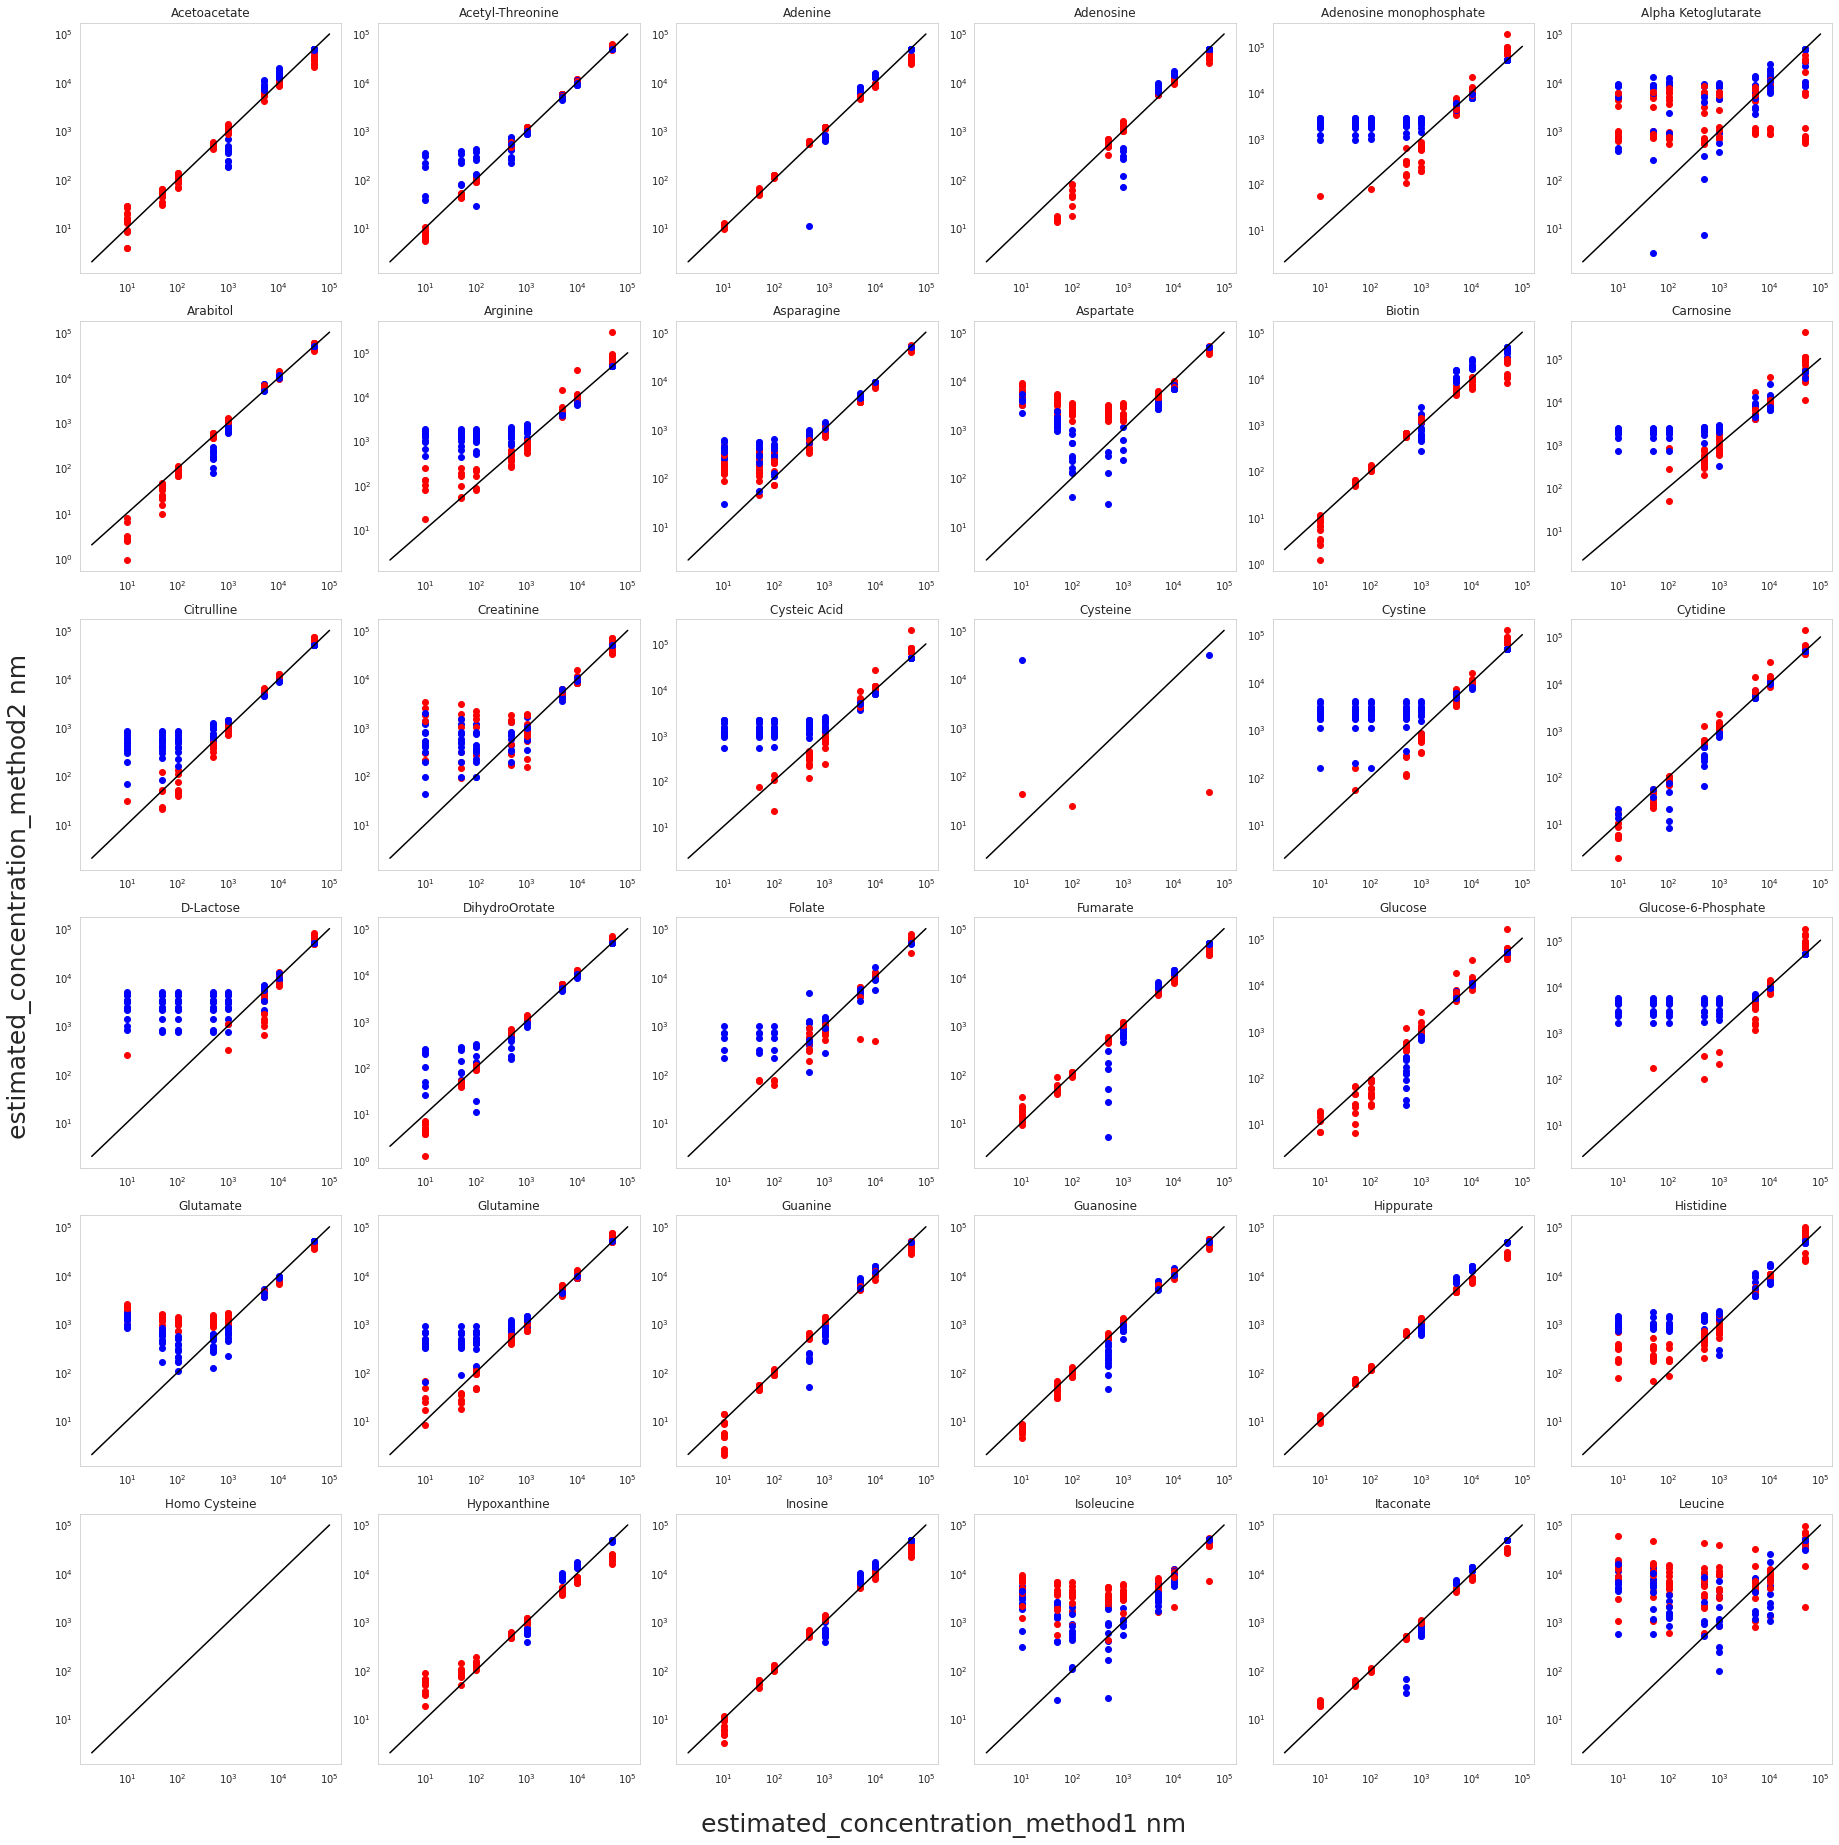

In [66]:
k = 0
metabs = df1_stdr.columns[1:-4]
fig, axs = plt.subplots(6,6, figsize = (25,25))
for i in range(6):
    for j in range(6):
        y = 0
        for plate in np.unique(df1_stdr.plate)[1:]:
#             x = range(y , y + len(df1_stdr[df1_stdr.plate == plate]) )
#             y = y + len(df1_stdr[df1_stdr.plate == plate ])
            axs[i,j].scatter(np.array(df1_stdr.conc[df1_stdr.plate == plate]) , np.array(df1_stdr_c2[metabs[k]][df1_stdr_c2.plate == plate]) , color ='red')  
            axs[i,j].scatter(np.array(df1_stdr.conc[df1_stdr.plate == plate]) , np.array(df1_stdr_c1[metabs[k]][df1_stdr_c1.plate == plate]) , color ='blue') 
        axs[i,j].plot([2,100000],[2,100000],'-',color = 'black')
        axs[i,j].set_yscale('log')
        axs[i,j].set_xscale('log')
        axs[i,j].grid(False)
        axs[i,j].set_title(metabs[k])
        k+=1
        
plt.tight_layout()
fig.text(0.5, -0.02, 'real_concentration(nm)', ha = 'center', fontsize = 25)
fig.text(-0.02, 0.5, 'estimated_concentration(nm)', va = 'center', rotation='vertical', fontsize = 25)
fig.tight_layout()


plt.savefig('200903_lfpa__comparison_estimated_concent_log_scale_linear_fitting_vs_real_concentration.pdf')# plt.savefig('200831_lfpa__testing_algorithm_for_finding_linear_range.pdf')
plt.show()